 L'apport principal de la bibliothèque Pandas est les tableaux. Mais tout comme Numy offre les tables et de nombreuses
 méthodes permettant d'effectuer des calculs dessus, Pandas offre aussi quelques outils. Les principaux concernent :
 
 * la transformation des données
 * les statistiques
 * les graphique

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(1000, 4),  # random variation everyday, an array of 1000 x 4
                   columns=['A', 'B', 'C', 'D'],
                   index=pd.date_range('1/1/2000', periods=1000))
df = df.cumsum()  # cumulative sum to make something like a regular variation (temperature, stock...)
df.head()

,A,B,C,D
2000-01-01,-0.025833,-0.330060,-0.423386,0.072628
2000-01-02,-0.063391,-1.867903,-2.817393,-2.540290
2000-01-03,2.511779,-1.185989,-2.236462,-2.245191
2000-01-04,2.617166,-1.371225,-2.247157,-0.730122
2000-01-05,1.459847,-0.084548,-3.873268,-0.264775


## Modifier les données

On a vu qu'il est possible d'effectuer des opérations arithmétiques sur les tableaux et sur leurs colonnes comme
on le fait avec Numpy sur des tables.

In [2]:
df['M'] = (df.A + df.B + df.C + df.D) / 4   # ou  df['M'] = df.mean(axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-0.025833,-0.330060,-0.423386,0.072628,-0.176663
2000-01-02,-0.063391,-1.867903,-2.817393,-2.540290,-1.822244
2000-01-03,2.511779,-1.185989,-2.236462,-2.245191,-0.788966
2000-01-04,2.617166,-1.371225,-2.247157,-0.730122,-0.432834
2000-01-05,1.459847,-0.084548,-3.873268,-0.264775,-0.690686


Modifier une colonne revient à la mettre à gauche du signe égal : `df.A = df.A + 2`.

La même chose peut être fait avec la méthode `transform` qui peut prendre différente 

#### Appliquer une fonction

On peut aussi appliquer une fonction vectorielle au tableau ce qui revient à l'appliquer a toutes ses colonnes
une par une (ou à toutes ses lignes avec `axis=1`).

In [3]:
df['M'] = df.apply(np.mean, axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-0.025833,-0.330060,-0.423386,0.072628,-0.176663
2000-01-02,-0.063391,-1.867903,-2.817393,-2.540290,-1.822244
2000-01-03,2.511779,-1.185989,-2.236462,-2.245191,-0.788966
2000-01-04,2.617166,-1.371225,-2.247157,-0.730122,-0.432834
2000-01-05,1.459847,-0.084548,-3.873268,-0.264775,-0.690686


In [4]:
def mean_deviation(w):
    try:
        return np.abs(w - w.mean()).mean()
    except:
        return np.nan
    
df.apply(mean_deviation)

A     6.017367
B    12.556252
C     6.508320
D     6.913497
M     4.073562
dtype: float64

## Statistiques d'un tableau

La méthode qui résume tout est `describe`.

In [5]:
df.describe()  # get statistics

,A,B,C,D,M
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.670753,-15.281351,-7.385394,-8.782117,-3.194527
std,7.315479,14.530123,7.917765,8.859422,4.730131
min,-0.063391,-41.910179,-24.777758,-33.400747,-15.153564
25%,14.237415,-25.846691,-13.062437,-14.186192,-6.913865
50%,17.701773,-18.404076,-7.732557,-7.841973,-3.596488
75%,24.787374,0.071778,-1.161971,-3.452215,0.619556
max,35.921023,15.671464,12.349744,12.172379,6.468317


Plus en détail Pandas fournit ces méthodes que le lecteur pourra tester :

```
count()    Number of non-null observations
sum()      Sum of values
mean()     Mean of values
median()   Arithmetic median of values
min()      Minimum
max()      Maximum
std()      Bessel-corrected sample standard deviation
var()      Unbiased variance
skew()     Sample skewness (3rd moment)
kurt()     Sample kurtosis (4th moment)
quantile() Sample quantile (value at %)
cov()      Unbiased covariance (binary)
corr()     Correlation (binary)
```

In [6]:
df.quantile(0.1)

A     9.038949
B   -34.001838
C   -17.641701
D   -21.302932
M    -9.079960
Name: 0.1, dtype: float64

##  Graphiques

Les graphiques sont un outil primordial pour comprendre les données aussi le prochain chapitre est entièrement
consacré aux différentes bibliothèques qui permette de faire des jolis graphiques.

En attendant Pandas intègre la fonction de tracé [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) qui est souvent suffisante.
Il n'est pas nécessaire de rentrer dans les détails de cette fonction pour l'instant. Elle fonctionne comme
la même fonction de la bibliothèque Matplotlib que l'on verra au prochain chapitre.

Note : sous Jupyter il est nécessaire d'indiquer `%matplotlib inline` pour que les graphiques s'affiche (à ne faire
qu'une fois par feuille).

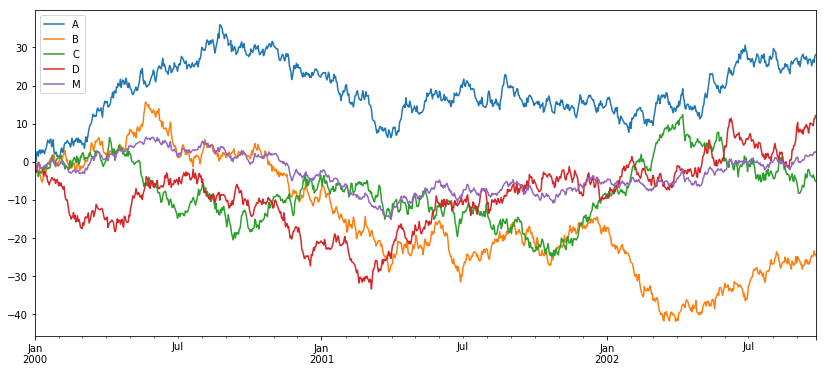

In [7]:
%matplotlib inline

df.plot(figsize=(14,6))

### Fenêtre glissante

Un outil bien utile de Pandas pour préparer des données que l'on désire tracer est la fenêtre glissante sur laquelle
on applique une fonction de son choix (souvent la moyenne mais l'ensemble des fonctions
statistiques citées ci-dessus peuvent être utilisées).

La taille de la fenêtre est

* un entier qui indique le nombre de lignes choisi
* un intervale temporel (seulement pour les tableaux chronologiques)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa65f7a84a8>,
      dtype=object)

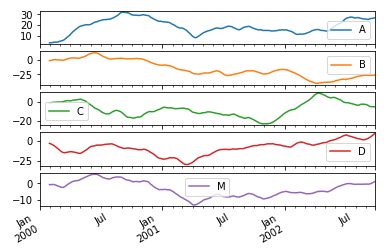

In [8]:
df.rolling(window=30).mean().plot(subplots=True)

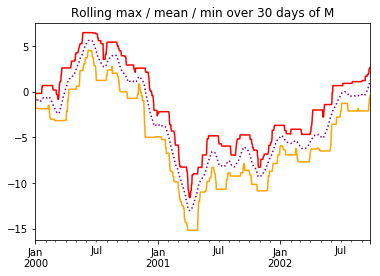

In [9]:
df['M'].rolling('30d').max().plot(color='red')
df['M'].rolling('30d').mean().plot(color='purple', style=':')
df['M'].rolling('30d').min().plot(title="Rolling max / mean / min over 30 days of M", color='orange')

On peut aussi faire des statistiques sur des fenêtres glissantes :

In [10]:
df.A.cov(df.A.rolling(window=30).mean())

44.032152248393594

{{ PreviousNext("pd07 -- Time dataframes.ipynb", "pd10 -- Getting data.ipynb")}}